In [85]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor

In [51]:
X=2*np.random.randn(100,1)
y=4+3*X+np.random.randn(100,1)

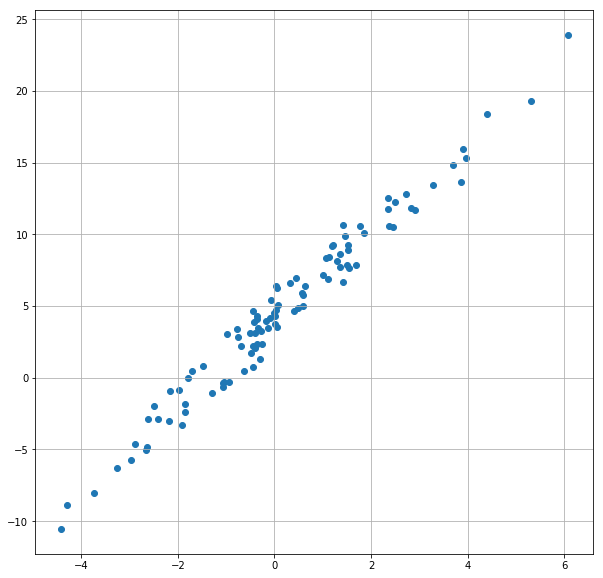

In [52]:
plt.scatter(X,y)
plt.rcParams['figure.figsize']=(10,10)
plt.grid()
plt.show()

## Linear regression using normal equation

Closed form equation
$$\theta=(X_TX)^{-1}X_Ty$$

In [53]:
X_b=np.hstack((np.ones((100,1)),X))
theta= np.linalg.inv((X_b.T.dot(X_b))).dot(X_b.T).dot(y)
y_predicted=X_b.dot(theta)

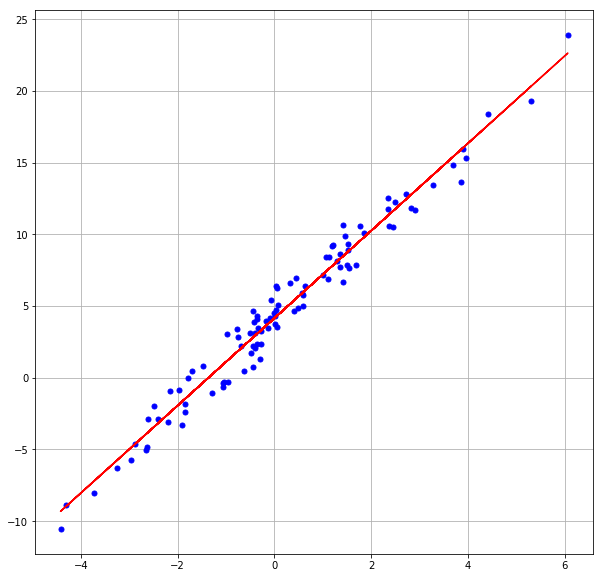

In [54]:
# Plot actual and predicted values
plt.plot(X,y,'b.',markersize=10)
plt.plot(X,y_predicted,'r-')
plt.grid()
plt.show()

## Linear regression using scikit-learn

In [56]:
lin_reg=LinearRegression()
lin_reg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [60]:
print('Intercept: ', lin_reg.intercept_)
print('Coeff: ',lin_reg.coef_)

Intercept:  [4.14902169]
Coeff:  [[3.0460007]]


In [59]:
y_predicted=lin_reg.predict(X)

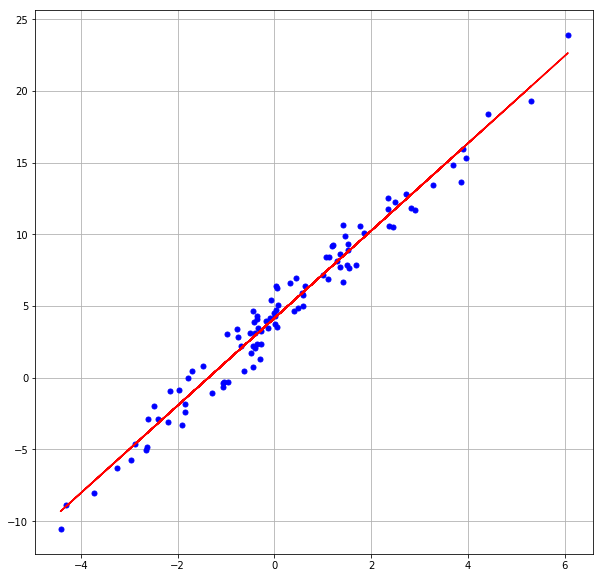

In [64]:
plt.plot(X,y,'b.',markersize=10)
plt.plot(X,y_predicted,'r-')
plt.grid()
plt.show()

## Implementing batch gradient descent

Shapes:
- $X(m,n)$
- $y(m,1)$
- $\theta(n,1)$

Batch gradient descent equation
$$\nabla_\theta MSE(\theta)=\frac{2}{m}X^T(X\theta-y)$$

In [70]:
learning_rate=0.1
m=100
n_iterations=1000

theta=np.random.randn(2,1)

for iteration in range(n_iterations):
    gradients=(2/m)*X_b.T.dot(X_b.dot(theta)-y)
    theta=theta-learning_rate*gradients
    
print("Theta: ")
print(theta)

Theta: 
[[4.14902169]
 [3.0460007 ]]


## Implementing stochastic gradient descent

In [84]:
n_epoch=50
t0,t1=5,50 #Learning schedule hyperparameters
m=100

def learning_schedule(t):
    return t0/(t + t1)

theta=np.random.randn(2,1)

for epoch in range(n_epoch):
    
    # To make sure that all training examples are used in training
    random_indices=np.random.permutation(m)
    for i in range(m):
        random_index=random_indices[i]
        
        # Train a single training example at a time
        xi=X_b[random_index:random_index+1]
        yi=y[random_index:random_index+1]
        gradients=2*xi.T.dot(xi.dot(theta)-yi)
        
        
        learning_rate=learning_schedule(epoch*m+i)
        theta=theta-learning_rate*gradients
        
 
print("Theta: ")
print(theta)

Theta: 
[[4.14293644]
 [3.03957989]]


## Stochastic gradient descent using scikit-learn

In [87]:
sgd_reg=SGDRegressor(max_iter=50,penalty=None,eta0=0.1)
sgd_reg.fit(X,y.ravel())

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.1, fit_intercept=True, l1_ratio=0.15,
       learning_rate='invscaling', loss='squared_loss', max_iter=50,
       n_iter=None, n_iter_no_change=5, penalty=None, power_t=0.25,
       random_state=None, shuffle=True, tol=None, validation_fraction=0.1,
       verbose=0, warm_start=False)

In [88]:
print('Intercept: ', sgd_reg.intercept_)
print('Coeff: ',sgd_reg.coef_)

Intercept:  [4.12018392]
Coeff:  [3.02880064]
